In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [3]:
START = "2022-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,3750.000000,3830.000000,3745.000000,3817.750000,3601.899658,2346158
1,2022-01-04,3831.100098,3889.149902,3811.699951,3884.750000,3665.111572,2488606
2,2022-01-05,3865.000000,3870.000000,3812.399902,3860.949951,3642.657227,1733031
3,2022-01-06,3812.000000,3835.000000,3772.000000,3807.449951,3592.182129,1810293
4,2022-01-07,3820.000000,3864.899902,3796.399902,3853.500000,3635.628662,2460591


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3750.000000,3830.000000,3745.000000,3817.750000,2346158
1,3831.100098,3889.149902,3811.699951,3884.750000,2488606
2,3865.000000,3870.000000,3812.399902,3860.949951,1733031
3,3812.000000,3835.000000,3772.000000,3807.449951,1810293
4,3820.000000,3864.899902,3796.399902,3853.500000,2460591


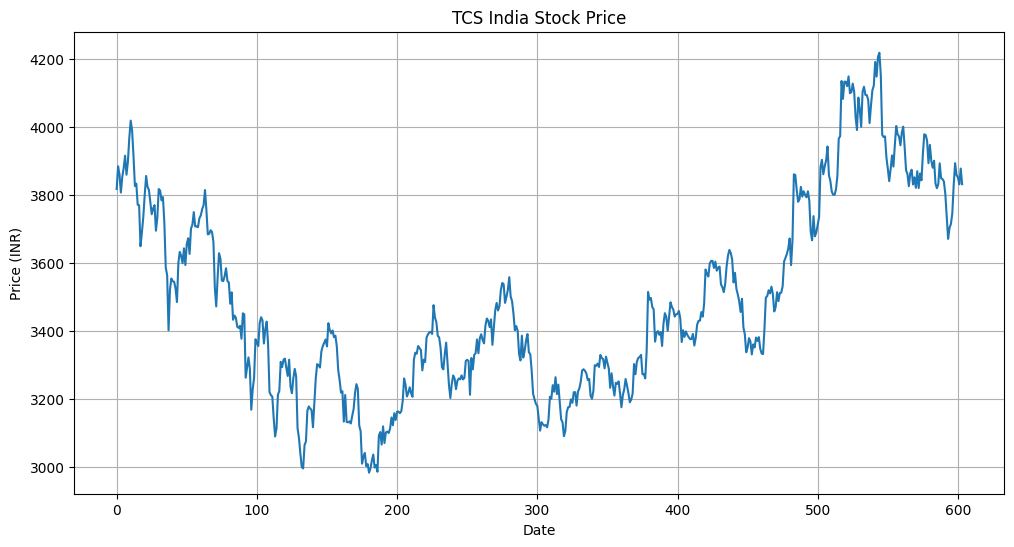

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [8]:
df

,Open,High,Low,Close,Volume
0,3750.000000,3830.000000,3745.000000,3817.750000,2346158
1,3831.100098,3889.149902,3811.699951,3884.750000,2488606
2,3865.000000,3870.000000,3812.399902,3860.949951,1733031
3,3812.000000,3835.000000,3772.000000,3807.449951,1810293
4,3820.000000,3864.899902,3796.399902,3853.500000,2460591
...,...,...,...,...,...
599,3895.000000,3905.899902,3841.899902,3858.699951,1734661
600,3845.000000,3879.949951,3841.000000,3852.100098,1419898
601,3874.399902,3893.500000,3827.449951,3831.649902,2177001
602,3856.800049,3890.000000,3852.000000,3878.149902,1932323


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
599    3940.666008
600    3942.056509
601    3943.017507
602    3942.971006
603    3942.253506
Name: Close, Length: 604, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

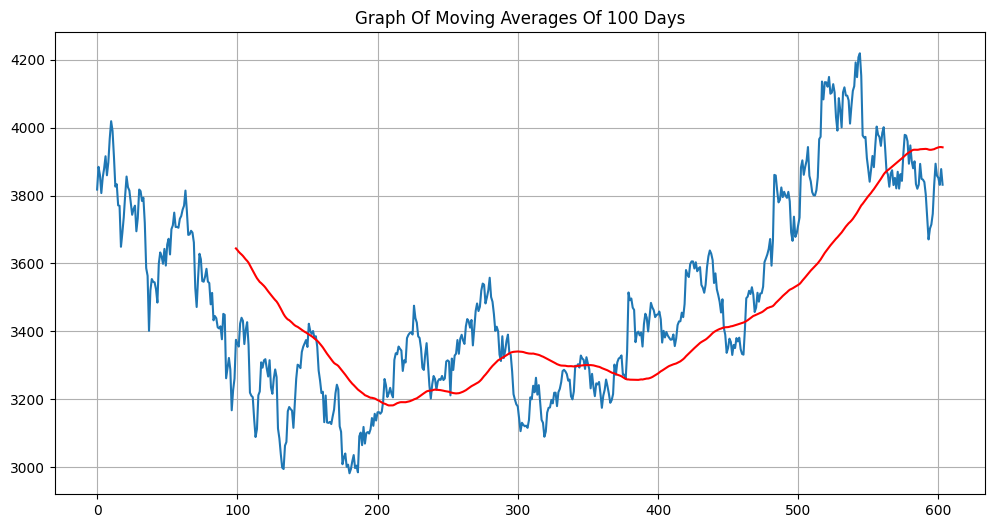

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
599    3737.486252
600    3739.497502
601    3741.363752
602    3743.575752
603    3745.900502
Name: Close, Length: 604, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

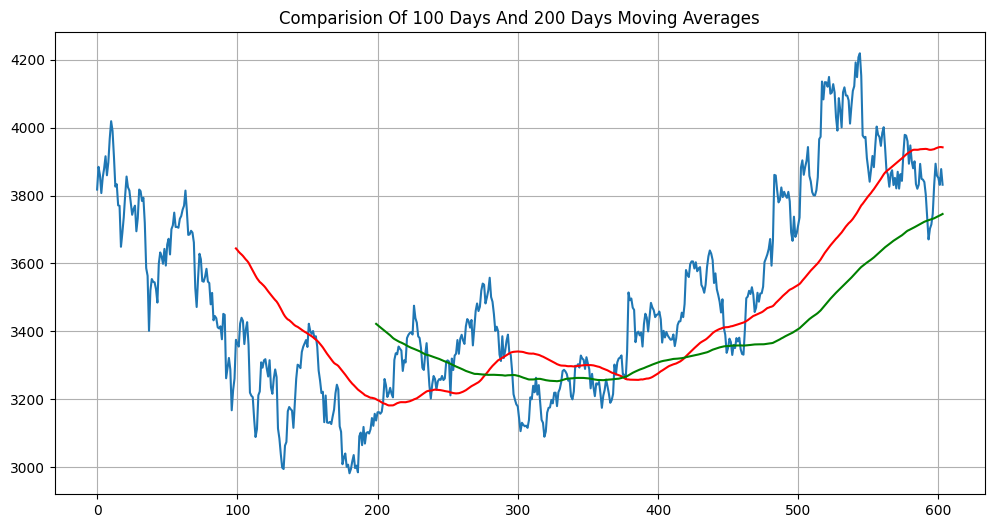

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(422, 7)
(182, 7)


In [14]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,3750.000000,3830.000000,3745.000000,3817.750000,3601.899658,2346158
1,2022-01-04,3831.100098,3889.149902,3811.699951,3884.750000,3665.111572,2488606
2,2022-01-05,3865.000000,3870.000000,3812.399902,3860.949951,3642.657227,1733031
3,2022-01-06,3812.000000,3835.000000,3772.000000,3807.449951,3592.182129,1810293
4,2022-01-07,3820.000000,3864.899902,3796.399902,3853.500000,3635.628662,2460591


In [15]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
422,2023-09-14,3570.050049,3597.699951,3545.600098,3560.050049,3508.980469,2604721
423,2023-09-15,3567.850098,3607.350098,3562.449951,3598.300049,3546.682129,2952897
424,2023-09-18,3580.050049,3619.300049,3575.250000,3606.149902,3554.418945,1395753
425,2023-09-20,3580.000000,3625.000000,3580.000000,3606.050049,3554.320557,1649396
426,2023-09-21,3588.550049,3605.000000,3528.000000,3585.300049,3533.868164,2004073


In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.80580471],
       [0.87040794],
       [0.84745929],
       [0.79587313],
       [0.84027584],
       [0.86568332],
       [0.90044353],
       [0.8464468 ],
       [0.88308744],
       [0.95082441],
       [1.        ],
       [0.9724715 ],
       [0.89923825],
       [0.81428996],
       [0.82099129],
       [0.76106466],
       [0.75966634],
       [0.64333241],
       [0.68267293],
       [0.72722019],
       [0.78931633],
       [0.84287921],
       [0.81240977],
       [0.80305657],
       [0.76844091],
       [0.73416258],
       [0.75065096],
       [0.76010043],
       [0.68739755],
       [0.72480962],
       [0.80585297],
       [0.80132115],
       [0.77345484],
       [0.7828078 ],
       [0.71097286],
       [0.58273063],
       [0.56093924],
       [0.40458964],
       [0.5194292 ],
       [0.55168256],
       [0.54392048],
       [0.54223309],
       [0.52290052],
       [0.48486156],
       [0.59579596],
       [0.62727812],
       [0.61604473],
       [0.595

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
x_train.shape

(322, 100, 1)

In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0755 - mean_absolute_error: 0.2446
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0189 - mean_absolute_error: 0.1092
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0172 - mean_absolute_error: 0.1079
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0148 - mean_absolute_error: 0.0979
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0152 - mean_absolute_error: 0.0974
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0163 - mean_absolute_error: 0.1031
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0143 - mean_absolute_error: 0.0977
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0137 - mean_absolute_error: 0.0934
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0132 - mean_absolute_error: 0.0920
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0111 - mean_absolute_error: 0.0838
Epoch 11/100
11/11 

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(182, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [29]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [30]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [31]:
final_df.head()

,0
0,3174.800049
1,3176.000000
2,3198.149902
3,3187.949951
4,3219.250000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [1.14888336e-03],
       [2.23561249e-02],
       [1.25902657e-02],
       [4.25582395e-02],
       [4.27017623e-02],
       [4.88281273e-03],
       [4.39464833e-02],
       [5.35209009e-02],
       [7.25741322e-02],
       [1.03834512e-01],
       [1.07233477e-01],
       [1.02781233e-01],
       [9.52654552e-02],
       [7.68347013e-02],
       [7.98026305e-02],
       [3.24571822e-02],
       [2.39839629e-02],
       [4.60051233e-02],
       [1.18626941e-01],
       [1.17047255e-01],
       [1.23079185e-01],
       [1.13648290e-01],
       [1.47541635e-01],
       [1.39355695e-01],
       [1.35382171e-01],
       [1.09818523e-01],
       [1.42850264e-01],
       [1.25233429e-01],
       [1.09243965e-01],
       [5.50529012e-02],
       [9.58397800e-02],
       [5.90261910e-02],
       [3.30317407e-02],
       [6.90314107e-02],
       [6.59676438e-02],
       [7.30049342e-02],
       [3.97338331e-02],
       [9.56039258e-05],
       [3.40847864e-02],


In [33]:
input_data.shape

(282, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(182, 100, 1)
(182,)


In [36]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [37]:
y_pred.shape

(182, 1)

In [38]:
y_test

array([0.36885444, 0.40547659, 0.41299236, 0.41289676, 0.39302984,
       0.41059876, 0.38522655, 0.39341273, 0.39685961, 0.346546  ,
       0.33874294, 0.32462068, 0.34750344, 0.39690753, 0.42759335,
       0.44382217, 0.43477416, 0.41658277, 0.35209921, 0.37919486,
       0.33438653, 0.31811002, 0.29915263, 0.26889738, 0.306142  ,
       0.22533378, 0.20613726, 0.15505765, 0.16865327, 0.19507876,
       0.18569578, 0.14921716, 0.177414  , 0.16860535, 0.19670636,
       0.18732339, 0.19795108, 0.16530223, 0.15189804, 0.150079  ,
       0.21973288, 0.30930161, 0.3137057 , 0.33012597, 0.32112587,
       0.34022679, 0.31925891, 0.27028586, 0.28278028, 0.32452484,
       0.29948783, 0.32251412, 0.32328012, 0.34161527, 0.41102979,
       0.42136998, 0.43266784, 0.44817835, 0.47613583, 0.40092874,
       0.47149215, 0.65699649, 0.65527305, 0.61410305, 0.57949163,
       0.58662452, 0.62157114, 0.59433197, 0.60931584, 0.5984967 ,
       0.59227333, 0.60922024, 0.58250747, 0.49494947, 0.47106

In [39]:
y_pred

array([[0.25061277],
       [0.2646767 ],
       [0.27951452],
       [0.29441208],
       [0.3087222 ],
       [0.32172996],
       [0.33307278],
       [0.3423593 ],
       [0.34941423],
       [0.3543154 ],
       [0.3565312 ],
       [0.35581988],
       [0.3521831 ],
       [0.34640986],
       [0.3401826 ],
       [0.33521688],
       [0.33269733],
       [0.3328582 ],
       [0.33514774],
       [0.33793688],
       [0.34036803],
       [0.34134722],
       [0.34009522],
       [0.33619803],
       [0.329423  ],
       [0.3206913 ],
       [0.31001514],
       [0.29746172],
       [0.28253272],
       [0.26517603],
       [0.24646617],
       [0.22783434],
       [0.2102305 ],
       [0.19444148],
       [0.18099621],
       [0.17024134],
       [0.16244422],
       [0.15789321],
       [0.15620111],
       [0.15675321],
       [0.15864643],
       [0.16214249],
       [0.16885853],
       [0.17946333],
       [0.19371873],
       [0.21063775],
       [0.22911489],
       [0.247

In [40]:
scaler.scale_

array([0.00095744])

In [41]:
scale_factor = 1/0.00080828
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

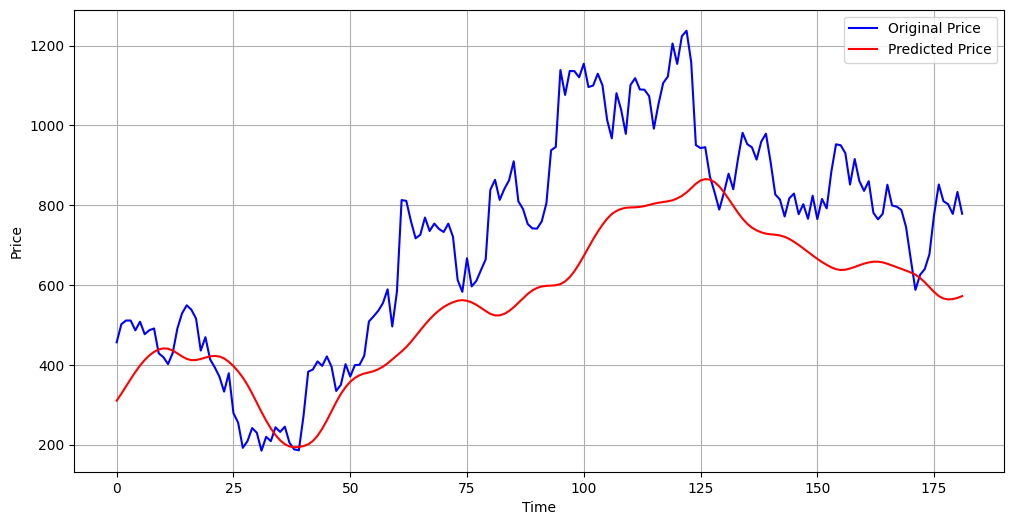

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 24.02%


In [44]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.3923827608304048


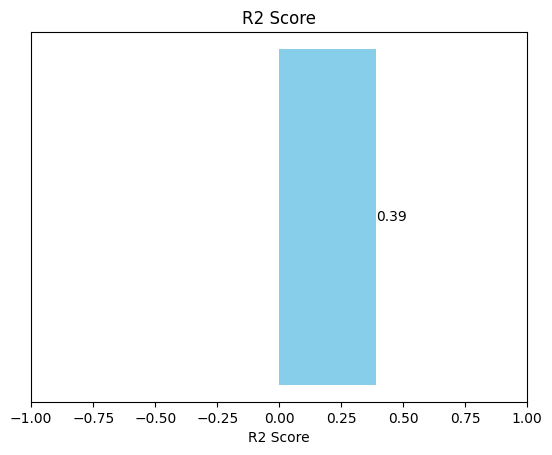

In [45]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

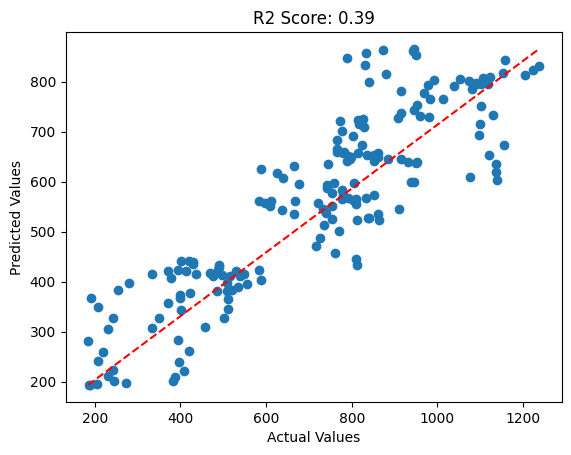

In [46]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()